In [1]:
import sys
sys.path.append('../krpc-0.5.4')
import krpc
from loguru import logger

In [2]:
conn = krpc.connect(name='Sub-orbital flight')

In [103]:
# Whether the current flight can be reverted to launch.
print(conn.space_center.can_revert_to_launch())
# 回到发射之前，在发射台的时候，测试代码的时候非常有用
if conn.space_center.can_revert_to_launch():
    conn.space_center.revert_to_launch()
else:
    logger.error("Cannot revert to launch")

True


In [ ]:
# Whether the UI is visible.
# Attribute:
# Can be read or written
# Return type:
# bool
# Game Scenes:
# Flight
# 效果如下图
conn.space_center.ui_visible = False
# conn.space_center.ui_visible = True #恢复

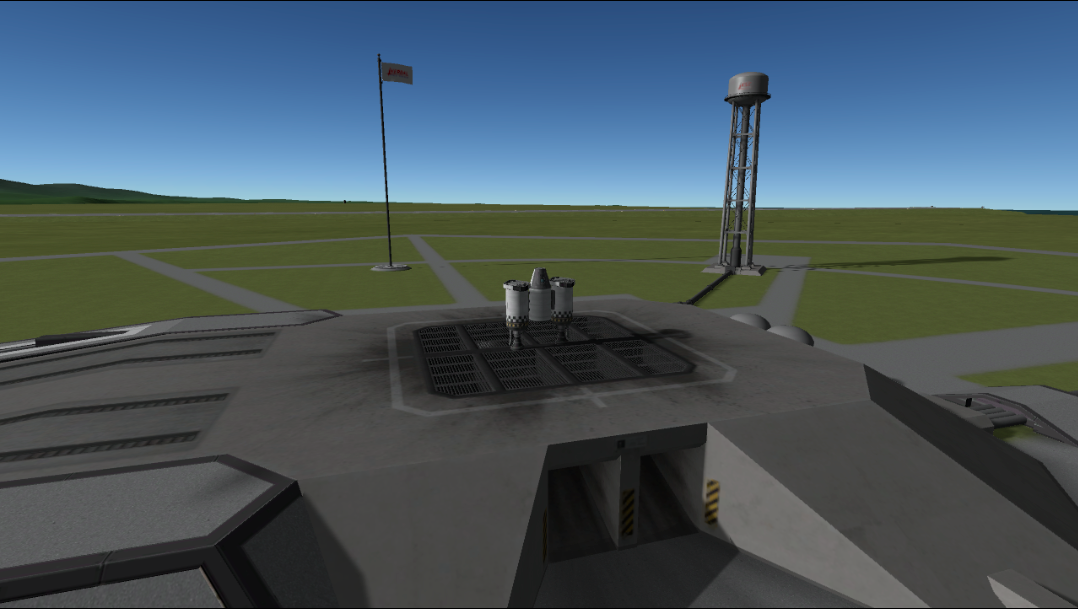

In [ ]:
conn.space_center.navball = False # 隐藏导航球
conn.space_center.navball = True # 显示导航球m

In [46]:
# 可以在游戏中通过给指令层命名的方式来给到不同的名字
# 这样可以明确知道对应关系，比如我构建了两个指令舱，然后分别命名为test1，和test2
for vessel in conn.space_center.vessels:
    print(vessel.name)

坎巴拉1-5
坎巴拉1-5 探测器
坎巴拉1-5 探测器


In [21]:
for engine in conn.space_center.active_vessel.parts.all:
    print(engine.name)

mk1pod.v2
Decoupler.1
RCSBlock.v2
RCSBlock.v2
RCSBlock.v2
RCSBlock.v2
fuelTank
liquidEngine3.v2
Decoupler.1
fuelTank.long
radialDecoupler2
solidBooster.v2
noseCone
radialDecoupler2
solidBooster.v2
noseCone
basicFin
basicFin
basicFin
basicFin
liquidEngine2
parachuteSingle
dockingPort3
batteryBankMini
dockingPort3
radialRCSTank
longAntenna


In [62]:
conn.space_center.active_vessel = conn.space_center.vessels[1]
conn.space_center.active_vessel.control.activate_next_stage()

[]

In [123]:
conn.space_center.camera.mode = conn.space_center.CameraMode(6)

In [122]:
conn.space_center.CameraMode(6)

<CameraMode.map: 6>

In [57]:
for engine in conn.space_center.active_vessel.parts.engines:
    engine.active = True

In [43]:
for engine in conn.space_center.vessels[1].parts.engines:
    engine.active = True

In [84]:
# 文档显示，active_vessel 是可读可写的，所以，可以手工切换vessel
# 也可以用来写换视角
vessel_dict = {}
for vessel in conn.space_center.vessels:
    vessel_dict[vessel.name] = vessel
print(conn.space_center.active_vessel.name)
conn.space_center.active_vessel = vessel_dict['test1']
print(conn.space_center.active_vessel.name)

test2
test1


In [90]:
conn.space_center.active_vessel = vessel_dict['test1']
print(conn.space_center.active_vessel.mass)
print(conn.space_center.active_vessel.dry_mass)

746.0000610351562
706.0000610351562


In [ ]:
# conn.space_center.active_vessel = vessel_dict['test2']
print(conn.space_center.active_vessel.thrust) # 推力大小，实时的，点火之后就会有数值
# 固推无法调整，但是液推是可变的，当我点火后，不给阀门，两者是不一样的，比如：
print(conn.space_center.active_vessel.available_thrust)

0.0
168411.5
